In [1]:
# import libraries 

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os 
from os import listdir
from os.path import isfile, join
from PIL import Image

%matplotlib inline

# Let's first import necessary libraries. 
# We need sklearn for KMeans algorithm, matplotlib.pyplot for plotting graphs, numpy to work with arrays, 
# cv2 to work with image data, collections to use Counter to count values, 
# rgb2lab to convert RGB values and deltaE_cie76 to calculate similarity between colors.

In [2]:
# mypath='crop'
# onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
# images = np.empty(len(onlyfiles), dtype=object)
# for n in range(0, len(onlyfiles)):
#   images[n] = cv2.imread( join(mypath,onlyfiles[n]) )

# images[2]

In [3]:
# We’d first define a function that will convert RGB to hex so that we can use them as labels for our pie chart.
# On reading the color which is in RGB space, we return a string. {:02x} simply displays the hex value for the respective color.

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [4]:
# KMeans expects flattened array as input during its fit method. 
# Thus, we need to reshape the image using numpy. 
# Then, we can apply KMeans to first fit and then predict on the image to get the results. 
# Then, the cluster colors are identified an arranged in the correct order. 
# We plot the colors as a pie chart.


def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    # First, we resize the image to the size 600 x 400. 
    # It is not required to resize it to a smaller size 
    # but we do so to lessen the pixels which’ll reduce the time needed to extract the colors from the image.
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    # KMeans expects the input to be of two dimensions, so we use Numpy’s reshape function to reshape the image data.
    # We then fit and predict on the same image to extract the prediction into the variable labels.
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    # We use Counter to get count of all labels. 

    counts = dict(sorted(counts.items()))
    
    # To find the colors, we use clf.cluster_centers_
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    # The ordered_colors iterates over the keys present in count, and then divides each value by 255. 
    # We could have directly divided each value by 255 but that would have disrupted the order.
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

# Next, we get the hex and rgb colors. 
# As we divided each color by 255 before, we now multiply it by 255 again while finding the colors. 
# If show_chart is True, we plot a pie chart with each pie chart portion defined using count.values(), 
# labels as hex_colors and colors as ordered_colors. 
# We finally return the rgb_colors which we’ll use at a later stage.

In [6]:
# this one generates a list with each np arrays of each picture / don't know if it is necessary

crop_folder = 'crop'
image_files = [ f for f in listdir(crop_folder) if isfile(join(crop_folder,f)) ]
images = np.empty(len(image_files), dtype=object)
for n in range(0, len(image_files)):
  images[n] = cv2.imread( join(crop_folder,image_files[n]) )

images[0]

array([[[237, 242, 241],
        [243, 248, 247],
        [230, 232, 232],
        ...,
        [130, 129, 131],
        [132, 131, 133],
        [138, 137, 139]],

       [[216, 221, 220],
        [231, 236, 235],
        [221, 223, 223],
        ...,
        [ 89,  88,  90],
        [ 81,  80,  82],
        [ 80,  79,  81]],

       [[230, 235, 236],
        [239, 244, 245],
        [223, 227, 228],
        ...,
        [122, 121, 123],
        [119, 118, 120],
        [121, 120, 122]],

       ...,

       [[ 82,  80,  80],
        [ 78,  76,  76],
        [ 73,  71,  71],
        ...,
        [119, 115, 114],
        [119, 115, 114],
        [117, 113, 112]],

       [[ 64,  62,  62],
        [ 77,  75,  75],
        [ 87,  85,  85],
        ...,
        [122, 118, 117],
        [125, 121, 120],
        [124, 120, 119]],

       [[ 34,  32,  32],
        [ 62,  60,  60],
        [ 88,  86,  86],
        ...,
        [110, 106, 105],
        [119, 115, 114],
        [124, 120, 119]]

In [9]:
images=[] 
folder = "crop"                           

images_names = [filename for filename in os.listdir(folder)]
crop_images_list = os.listdir(folder)
crop_images_list
# img = [cv2.imread(str(file)) for file in folder]
#    

# img
# returning an empty list with 4 elements

['1.jpeg', '2.jpeg', '3.jpeg']

In [10]:
for i in range(0,len(crop_images_list)):
    crop_images_list[i]='crop/' + crop_images_list[i][0] + ".jpeg"
print(crop_images_list)

type(crop_images_list[0])

[i for i in crop_images_list]

['crop/1.jpeg', 'crop/2.jpeg', 'crop/3.jpeg']


['crop/1.jpeg', 'crop/2.jpeg', 'crop/3.jpeg']

In [12]:
img1 = cv2.imread('crop/1.jpg')
img2 = cv2.imread('crop/2.jpg')


In [106]:
image = cv2.imread('crop/1.jpg')


In [107]:
image = cv2.cvtColor(cv2.imread('crop/1.jpg'), cv2.COLOR_BGR2RGB)

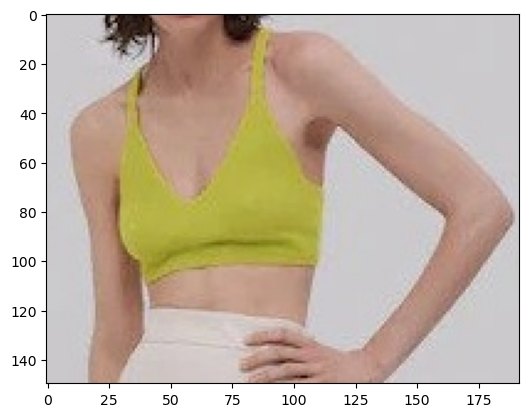

In [108]:
plt.imshow(cv2.cvtColor(cv2.imread(crop_images_list[0]), cv2.COLOR_BGR2RGB))

[array([183.04732222, 146.48342438, 129.85231358]),
 array([204.49249255, 200.2221032 , 201.52758942]),
 array([177.73932473, 170.65746028,  68.6321996 ]),
 array([122.70063737,  88.68856794,  69.82573908])]

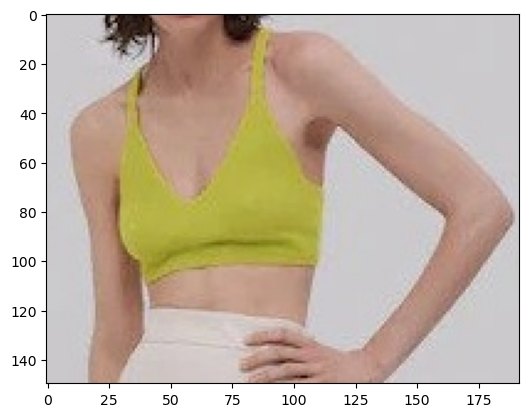

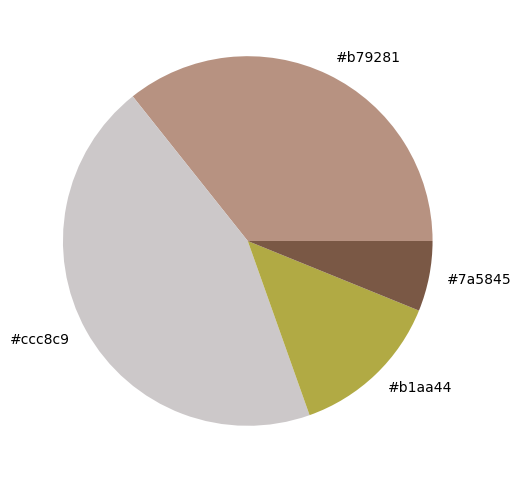

In [109]:
image = cv2.imread('crop/1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

get_colors(get_image('crop/1.jpg'), 4, True)


[array([188.11281179, 154.02834467, 138.33956916]),
 array([199.09358031, 191.7459528 , 190.47962446]),
 array([141.69514563, 101.33980583,  86.3631068 ]),
 array([206.50390476, 198.7602381 , 198.10633333]),
 array([170.33968463, 134.30157687, 119.15505913]),
 array([190.64653692, 181.23926732, 176.87922152])]

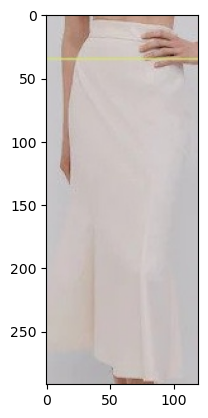

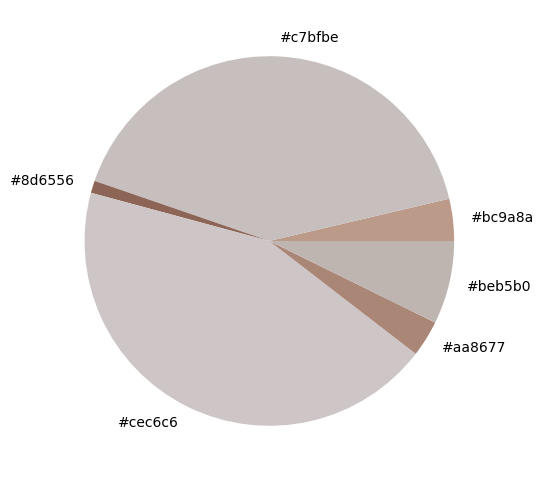

In [111]:
image = cv2.imread('crop/2.jpg')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

get_colors(get_image('crop/2.jpg'), 6, True)

# image: The image whose colors we wish to extract.
# number_of_colors: Total colors we want to extract. (Before it was on 8, but with 3 colors, I can identify which is the predominant one, a.k.a the color from the piece of cloth)
# show_chart: A boolean that decides whether we show the pie chart or not. True


# https://www.favocolor.com/hex/cbccd2
# In a RGB color space, hex #CBCCD2 (known as American Silver color) is composed of 80% red, 80% green and 82% blue. 
# Whereas in a CMYK color space, it is composed of 3% cyan, 3% magenta, 0% yellow and 18% black. 

# Hex codes are a hexadecimal format for identifying colors. 
# This is a system used in HTML, CSS and SVG. 
# Each hex code refers to a very specific color, which allows for two designers or a designer and developer 
# to be on the same page about what exact light blue (or any other color) they are referring to.


# reverse engine : searching for the pics with the colors we want

In [69]:
# Search images using Color
# From the model above, we can extract the major colors. This create the opportunity to search for images based on certain colors. We can select a color and if it's hex matches or is close to the hex of the major colors of the image, we say it's a match.

# We first get all the images and store them in the images variable.

In [112]:
IMAGE_DIRECTORY = 'crop'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

In [71]:
# The images are in the folder crop. 
# We define COLORS as a dictionary of colors. 
# Then, we read all images in that folder and save their values in the images array.

TypeError: Image data of dtype object cannot be converted to float

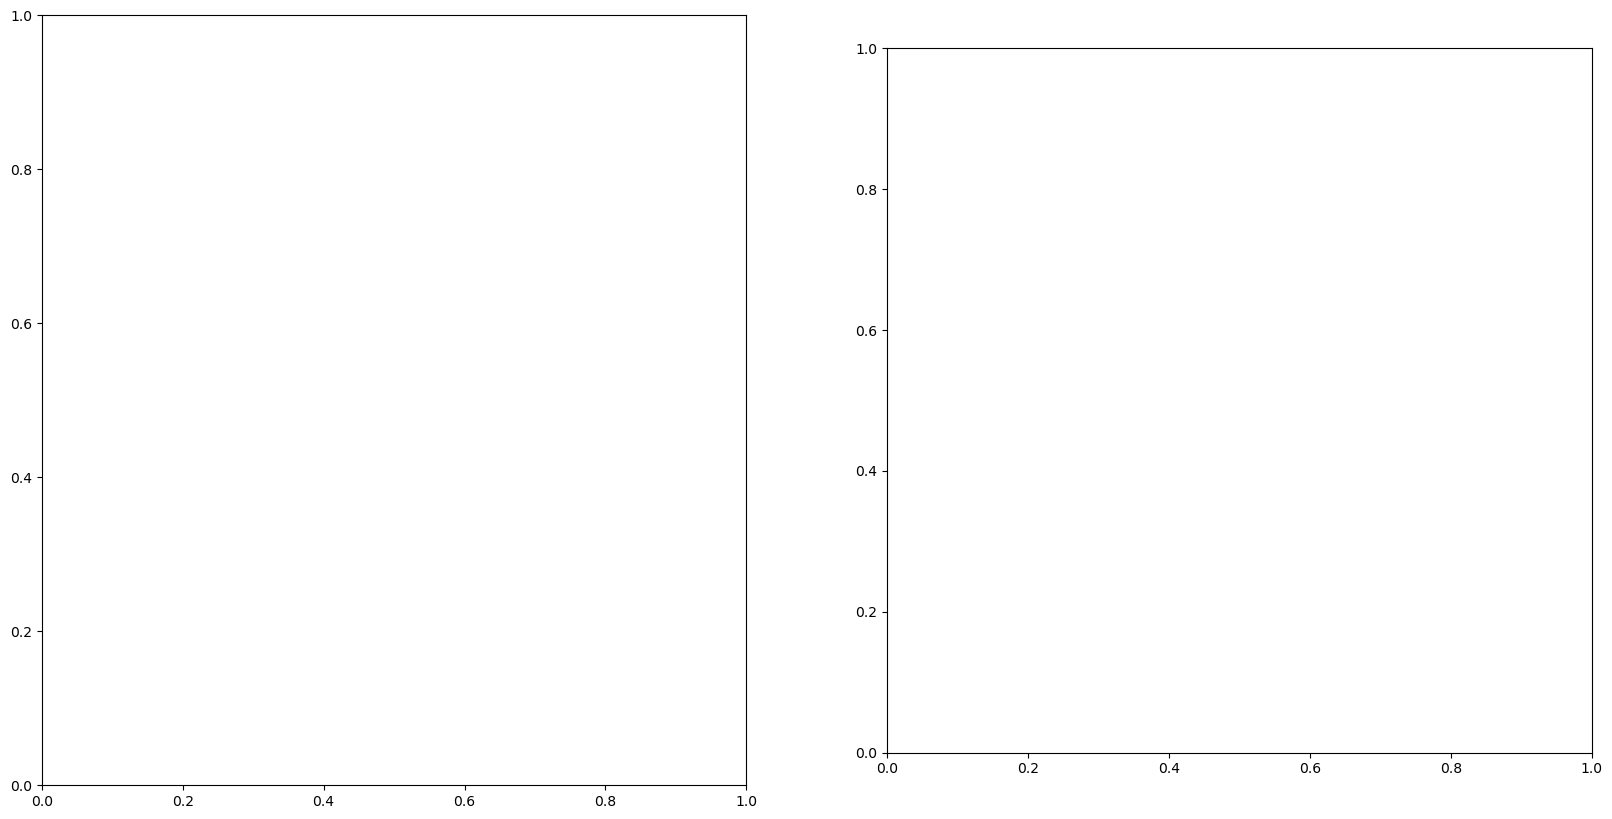

In [113]:
plt.figure(figsize=(20, 10))
hello = [plt.subplot(1, len(images), i+1) for i in range(len(images))]
plt.imshow(hello)

# We split the area into subplots equal to the number of images. 
# The method takes the arguments as number of rows = 1, 
# number of columns = all images i.e. 3 in our case and the index.

In [ ]:
images

[array([[[229, 229, 231],
         [228, 228, 230],
         [227, 228, 232],
         ...,
         [204, 205, 207],
         [206, 207, 209],
         [207, 208, 210]],
 
        [[228, 228, 230],
         [229, 229, 231],
         [227, 228, 232],
         ...,
         [202, 202, 204],
         [203, 204, 206],
         [205, 205, 207]],
 
        [[230, 230, 232],
         [230, 230, 232],
         [229, 230, 234],
         ...,
         [203, 201, 202],
         [203, 203, 203],
         [204, 202, 203]],
 
        ...,
 
        [[117, 107,  97],
         [117, 107,  97],
         [116, 108,  97],
         ...,
         [125, 115, 103],
         [124, 114, 102],
         [124, 114, 102]],
 
        [[119, 109,  99],
         [119, 109,  99],
         [118, 110,  99],
         ...,
         [125, 115, 103],
         [125, 115, 103],
         [126, 116, 104]],
 
        [[122, 112, 102],
         [121, 111, 101],
         [120, 112, 101],
         ...,
         [125, 115, 103],
  

In [ ]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [ ]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

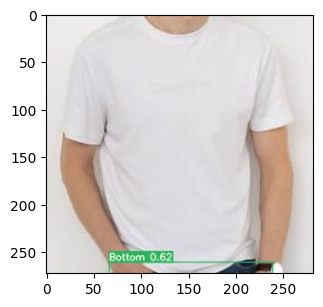

In [ ]:
# Search for GREEN
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

In [ ]:
# Search for YELLOW
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)

<Figure size 2000x1000 with 0 Axes>